# <font color='blue'>Project - Bank Personal Loan Modelling</font>
*Prasad Menon*


## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1881]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True) # adds a nice background to the graphs

In [1882]:
# Read the dataset into dataframe
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [1883]:
#This function returns the first 5 rows 
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [1884]:
#Get shape of the dataframe
bank_data.shape   # 5000 rows and 14 columns

(5000, 14)

In [1885]:
#Return a Series with the data type of each column
bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [1886]:
#Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [1887]:
# check null values
bank_data.isnull().values.any()   # No null values

False

In [1888]:
# Total number of missing values
print(bank_data.isnull().sum().sum())   # 0 missing values

0


In [1889]:
#Multiply with 1000 and make the data in the right format
bank_data['Income'] = bank_data['Income'].apply(lambda x: x*1000)
bank_data['CCAvg'] = bank_data['CCAvg'].apply(lambda x: x*1000)
bank_data['Mortgage'] = bank_data['Mortgage'].apply(lambda x: x*1000)

# Some values in expirience column is coming as negative, taking absolute value and correcting it
bank_data['Experience'] = bank_data['Experience'].abs()

# Some customers with high income and more family members and considerable credit card spendings have income 0,
# Imputing the expirience of such customers with the mean expirience value
bank_data['Experience'] = bank_data['Experience'].map( lambda x : bank_data.Experience.mean() if x == 0 else x)

In [1890]:
#df_dummies= pd.get_dummies(bank_data, prefix='Education', columns=['Education']) #This function does One-Hot-Encoding on categorical text
df_dummies= pd.get_dummies(bank_data, columns=['Education', 'Family','CD Account','Securities Account'], drop_first=True)
#df_dummies= pd.get_dummies(bank_data, columns=['Education', 'Family'], drop_first=True)

In [1891]:
# find the pairwise correlation of all columns in the dataframe
df_dummies.corr()
# Income and Average have a high positive co-relation to the customers who took personal loan
# Out of the 480 customers who took personal loan, 91% customers had income greater than 100, 000$
# Out of the 480 customers who took personal loan, 95% had monthly credit card spending greater than 500$

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1,Securities Account_1
ID,1.000000,-0.008473,-0.002153,-0.017695,0.013432,-0.024675,-0.013920,-0.024801,-0.002528,0.017028,-0.004722,0.021977,0.019918,0.012015,-0.029206,-0.006909,-0.016972
Age,-0.008473,1.000000,0.974459,-0.055269,-0.029216,-0.052012,-0.012539,-0.007726,0.013702,0.007681,-0.016264,0.045838,0.008061,0.034517,-0.065557,0.008043,-0.000436
Experience,-0.002153,0.974459,1.000000,-0.050013,-0.028452,-0.050316,-0.014935,-0.007670,0.008190,0.005558,-0.017331,0.029325,0.014563,0.027395,-0.061936,0.006939,0.000297
Income,-0.017695,-0.055269,-0.050013,1.000000,-0.016410,0.645984,0.206806,0.502462,0.014206,-0.002385,-0.128364,-0.108878,0.134485,-0.075085,-0.139140,0.169738,-0.002616
ZIP Code,0.013432,-0.029216,-0.028452,-0.016410,1.000000,-0.004061,0.007383,0.000107,0.016990,0.007691,0.037141,-0.034123,0.001480,0.009301,0.004187,0.019972,0.004704
CCAvg,-0.024675,-0.052012,-0.050316,0.645984,-0.004061,1.000000,0.109905,0.366889,-0.003611,-0.006689,-0.090366,-0.080413,0.100808,-0.068411,-0.088922,0.136534,0.015086
Mortgage,-0.013920,-0.012539,-0.014935,0.206806,0.007383,0.109905,1.000000,0.142095,-0.005995,-0.007231,-0.031806,-0.014942,0.041465,-0.014232,-0.023428,0.089311,-0.005411
Personal Loan,-0.024801,-0.007726,-0.007670,0.502462,0.000107,0.366889,0.142095,1.000000,0.006278,0.002802,0.071491,0.090212,-0.028532,0.060942,0.026364,0.316355,0.021954
Online,-0.002528,0.013702,0.008190,0.014206,0.016990,-0.003611,-0.005995,0.006278,1.000000,0.004210,0.020590,-0.023837,-0.023682,0.008360,0.012059,0.175880,0.012627
CreditCard,0.017028,0.007681,0.005558,-0.002385,0.007691,-0.006689,-0.007231,0.002802,0.004210,1.000000,-0.012196,-0.004113,0.022016,-0.006495,0.006877,0.278644,-0.015028


In [1892]:
df_dummies.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1,Securities Account_1
0,1,25,1.0,49000,91107,1600.0,0,0,0,0,0,0,0,0,1,0,1
1,2,45,19.0,34000,90089,1500.0,0,0,0,0,0,0,0,1,0,0,1
2,3,39,15.0,11000,94720,1000.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9.0,100000,94112,2700.0,0,0,0,0,1,0,0,0,0,0,0
4,5,35,8.0,45000,91330,1000.0,0,0,0,1,1,0,0,0,1,0,0


## 2. EDA: Study the data distribution in each attribute and target variable, share your findings  (20 marks)

In [1893]:
#  Number of unique in each column?
#  Number of people with zero mortgage?
#  Number of people with zero credit card spending per month?
#  Value counts of all categorical columns.
#  Univariate and Bivariate
#  Get data model ready

In [1894]:
# Number of unique in each column
df_dummies.nunique()

ID                      5000
Age                       45
Experience                44
Income                   162
ZIP Code                 467
CCAvg                    108
Mortgage                 347
Personal Loan              2
Online                     2
CreditCard                 2
Education_2                2
Education_3                2
Family_2                   2
Family_3                   2
Family_4                   2
CD Account_1               2
Securities Account_1       2
dtype: int64

In [1895]:
#Number of people with zero mortgage?
df_dummies[df_dummies.Mortgage.eq(0)].shape  # 3462 customers have mortgage as 0

(3462, 17)

In [1896]:
#Number of people with zero credit card spending per month
df_dummies[df_dummies.CCAvg.eq(0)].shape    # 106 customers with 0 credit card spending

(106, 17)

In [1897]:
#Value counts of all categorical columns.
bank_data_copy = bank_data.copy()
bank_data_copy['Education']=bank_data_copy['Education'].replace({1:'Undergrad',2:'Graduate',3:'Advanced/Professional'})
bank_data_copy['Family']=bank_data_copy['Family'].replace({1:'One  Member',2:'Two Members',3:'Three Members',4:'Four Members'})

family_column = bank_data_copy['Family'].value_counts() 
print(family_column) 

education_column = bank_data_copy['Education'].value_counts() 
print(education_column) 

One  Member      1472
Two Members      1296
Four Members     1222
Three Members    1010
Name: Family, dtype: int64
Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64


Text(0, 0.5, 'Number of Customers')

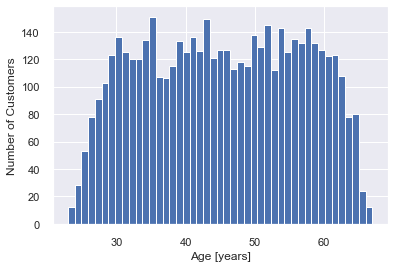

In [1898]:
# Univariate and Bivariate Analysis


# Univariate Analysis
#Plotting customers based on Age
sns.distplot(df_dummies['Age'], kde=False, hist_kws={"alpha": 1}, bins=df_dummies['Age'].nunique()) 
# 4512/5000  = 90% of the customers of the bank are above 30 years of age
plt.xlabel('Age [years]')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

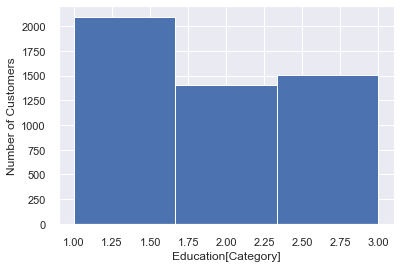

In [1899]:
# Plotting customers based on education
sns.distplot(bank_data['Education'], kde=False, hist_kws={"alpha": 1}, bins=bank_data['Education'].nunique());
# Most customers in the bank are undergraduates, followed by followed by professionals and then by Grduates
plt.xlabel('Education[Category]')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

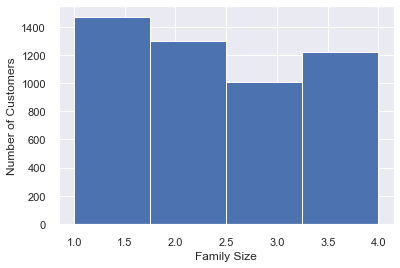

In [1900]:
#Plotting customers based on Family Members
#sns.distplot(bank_data['Family'])    
sns.distplot(bank_data['Family'], kde=False, hist_kws={"alpha": 1}, bins=bank_data['Family'].nunique());
# Most customers in bank are singles, followed by family with 2 members, followed by family with 4 family members and family with three members form the smallest group
plt.xlabel('Family Size')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

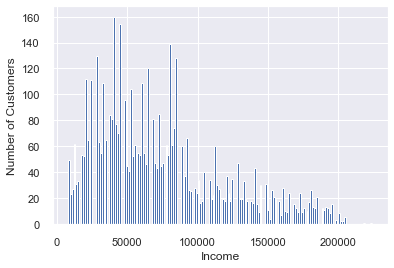

In [1901]:
# Plotting customers based on Income
#sns.distplot(bank_data['Income'])  
sns.distplot(df_dummies['Income'], kde=False, hist_kws={"alpha": 1}, bins=df_dummies['Income'].nunique());
# 3788/5000 = 75% of the customers earn less than 100,000 $
plt.xlabel('Income')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

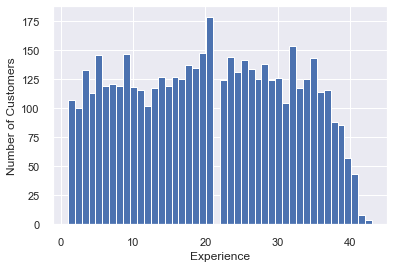

In [1902]:
#Plotting customers based on Expirience
sns.distplot(df_dummies['Experience'], kde=False, hist_kws={"alpha": 1}, bins=df_dummies['Experience'].nunique());
plt.xlabel('Experience')
plt.ylabel('Number of Customers')

In [1903]:
# Univariate Analysis Findings
# 1. 90% of the customers of the bank are above 30 years of age
# 2. Most customers in the bank are undergraduates, followed by followed by professionals and then by Grduates
# 3. Most customers in bank are singles, followed by family with 2 members, followed by family with 4 family members and family with three members form the smallest group
# 4. 75% of the customers earn less than 100,000 $

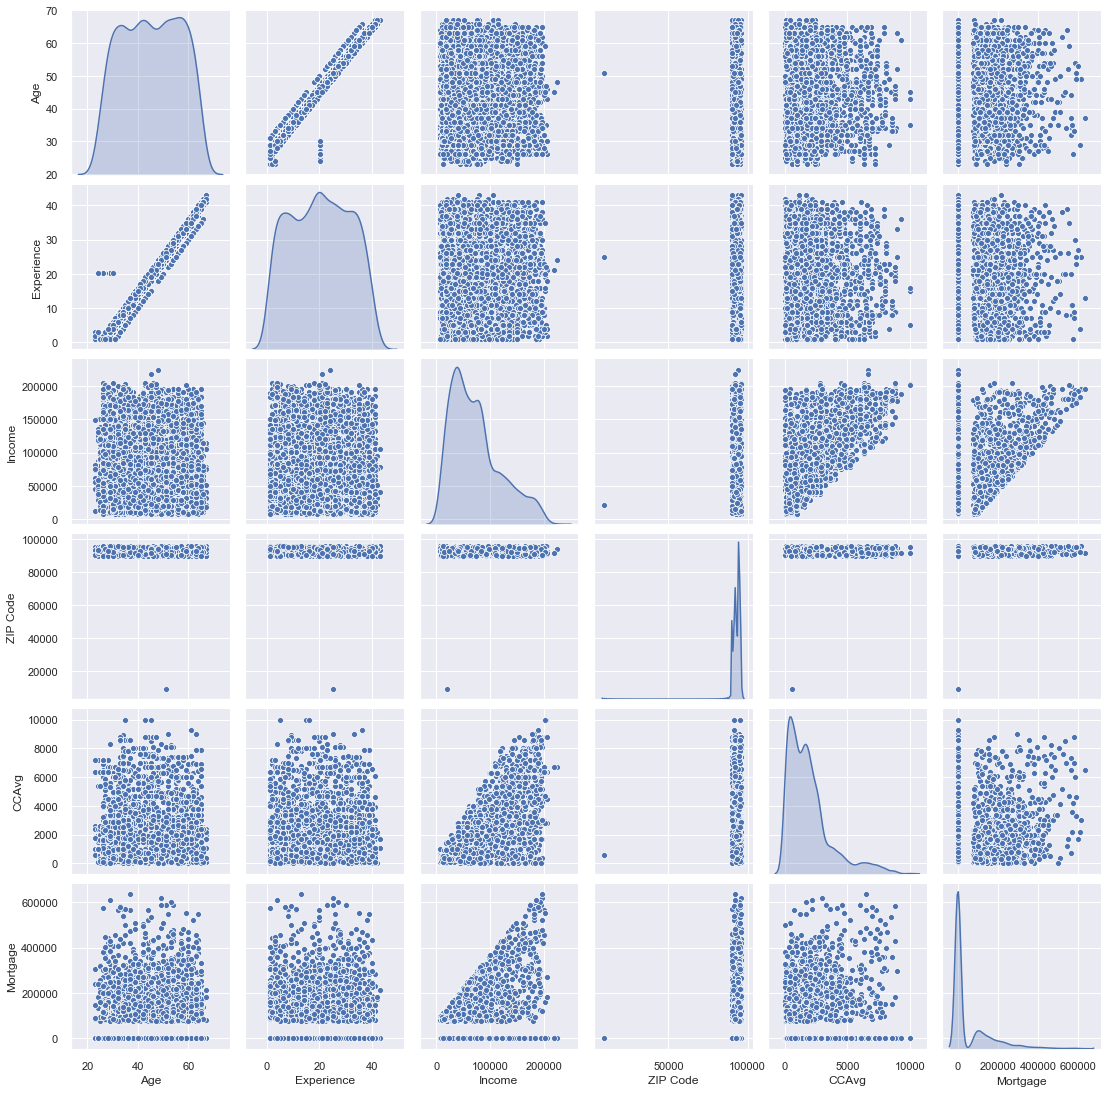

In [1904]:
# Bivariate Analysis
bank_data_attr = df_dummies.iloc[:, 1:7]
sns.pairplot(bank_data_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag
# As Age increases, Income also increases
# As Age increases, Expirience also increases
# As income increases, average credit card spending increases

In [1905]:
# Get a table with all the correlations calculated for the numerical columns.
df_dummies.corr()
# Income and Average have a high positive co-relation to the customers who took personal loan
# Out of the 480 customers who took personal loan, 91% customers had income greater than 100, 000$
# Out of the 480 customers who took personal loan, 95% had monthly credit card spending greater than 500$

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1,Securities Account_1
ID,1.000000,-0.008473,-0.002153,-0.017695,0.013432,-0.024675,-0.013920,-0.024801,-0.002528,0.017028,-0.004722,0.021977,0.019918,0.012015,-0.029206,-0.006909,-0.016972
Age,-0.008473,1.000000,0.974459,-0.055269,-0.029216,-0.052012,-0.012539,-0.007726,0.013702,0.007681,-0.016264,0.045838,0.008061,0.034517,-0.065557,0.008043,-0.000436
Experience,-0.002153,0.974459,1.000000,-0.050013,-0.028452,-0.050316,-0.014935,-0.007670,0.008190,0.005558,-0.017331,0.029325,0.014563,0.027395,-0.061936,0.006939,0.000297
Income,-0.017695,-0.055269,-0.050013,1.000000,-0.016410,0.645984,0.206806,0.502462,0.014206,-0.002385,-0.128364,-0.108878,0.134485,-0.075085,-0.139140,0.169738,-0.002616
ZIP Code,0.013432,-0.029216,-0.028452,-0.016410,1.000000,-0.004061,0.007383,0.000107,0.016990,0.007691,0.037141,-0.034123,0.001480,0.009301,0.004187,0.019972,0.004704
CCAvg,-0.024675,-0.052012,-0.050316,0.645984,-0.004061,1.000000,0.109905,0.366889,-0.003611,-0.006689,-0.090366,-0.080413,0.100808,-0.068411,-0.088922,0.136534,0.015086
Mortgage,-0.013920,-0.012539,-0.014935,0.206806,0.007383,0.109905,1.000000,0.142095,-0.005995,-0.007231,-0.031806,-0.014942,0.041465,-0.014232,-0.023428,0.089311,-0.005411
Personal Loan,-0.024801,-0.007726,-0.007670,0.502462,0.000107,0.366889,0.142095,1.000000,0.006278,0.002802,0.071491,0.090212,-0.028532,0.060942,0.026364,0.316355,0.021954
Online,-0.002528,0.013702,0.008190,0.014206,0.016990,-0.003611,-0.005995,0.006278,1.000000,0.004210,0.020590,-0.023837,-0.023682,0.008360,0.012059,0.175880,0.012627
CreditCard,0.017028,0.007681,0.005558,-0.002385,0.007691,-0.006689,-0.007231,0.002802,0.004210,1.000000,-0.012196,-0.004113,0.022016,-0.006495,0.006877,0.278644,-0.015028


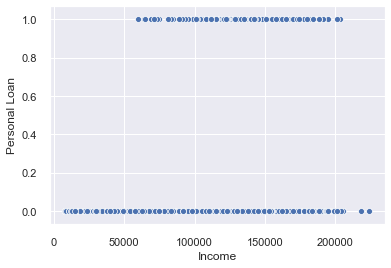

In [1906]:
sns.scatterplot(df_dummies['Income'], df_dummies['Personal Loan'])
# Out of the 480 customers who took personal loan, 91% customers had income greater than 100, 000$

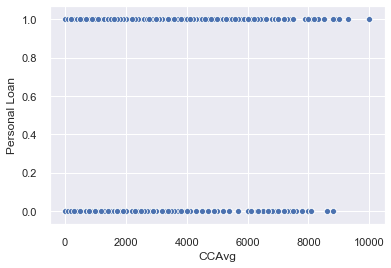

In [1907]:
sns.scatterplot(df_dummies['CCAvg'], df_dummies['Personal Loan'])
# Out of the 480 customers who took personal loan, 95% had monthly credit card spending greater than 500$

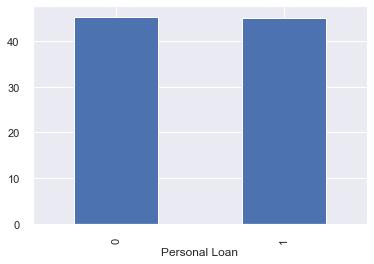

In [1908]:
bank_data.groupby('Personal Loan')['Age'].mean().plot(kind='bar')
# Age of a customer does not have correlation to whether a customer would take personal loan or not

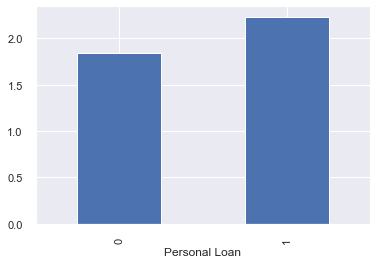

In [1909]:
bank_data.groupby('Personal Loan')['Education'].mean().plot(kind='bar')
# Educated people are more likely to take personal loan

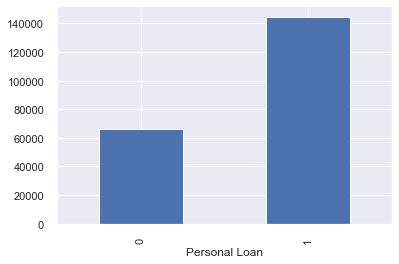

In [1910]:
bank_data.groupby('Personal Loan')['Income'].mean().plot(kind='bar')
# Income has a positive co-relation to the customers taking loan

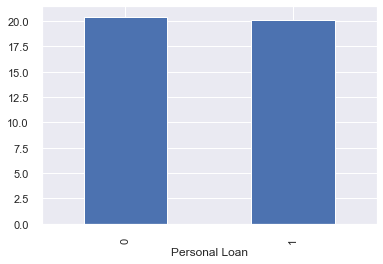

In [1911]:
bank_data.groupby('Personal Loan')['Experience'].mean().plot(kind='bar')
#Expirience of a customer does not have correlation to whether a customer would take personal loan or not

C:\Users\pmenon001c\Anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


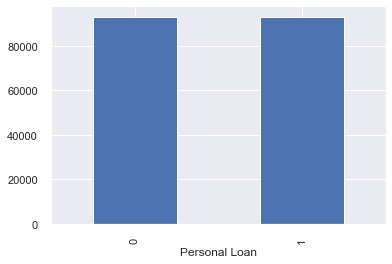

In [1912]:
bank_data.groupby('Personal Loan')['ZIP Code'].mean().plot(kind='bar')
#Zip code of a customer does not have correlation to whether a customer would take personal loan or not

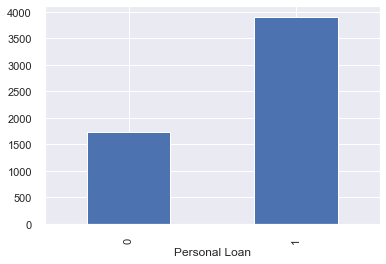

In [1913]:
bank_data.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')
# Customers with higher credit card spending are more likely to take personal loan

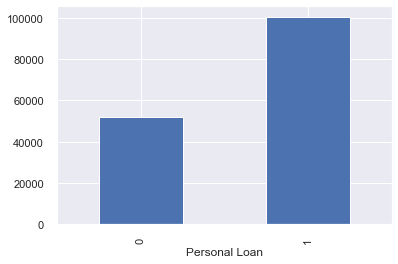

In [1914]:
bank_data.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')
# Customers with Mortgage have high correlation to customers taking personal loan

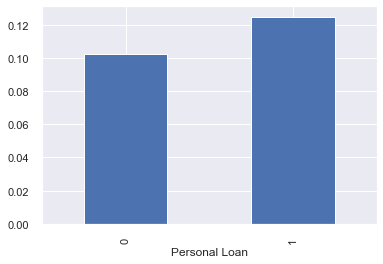

In [1915]:
bank_data.groupby('Personal Loan')['Securities Account'].mean().plot(kind='bar')
# Customers with Securities Account are more likely to take personal loan

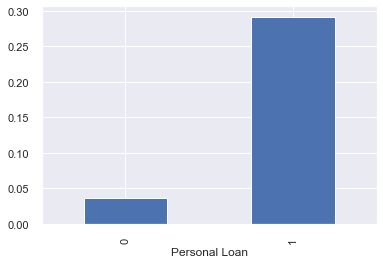

In [1916]:
bank_data.groupby('Personal Loan')['CD Account'].mean().plot(kind='bar')
# Customers with certificate of deposit Account are more likely to take personal loan

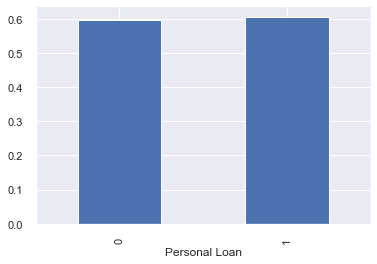

In [1917]:
bank_data.groupby('Personal Loan')['Online'].mean().plot(kind='bar')
# Customers using internet banking facilities do not have any co-relation to whether a customer would take personal loan or not

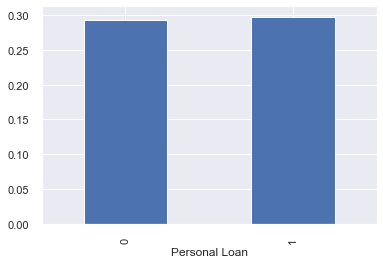

In [1918]:
bank_data.groupby('Personal Loan')['CreditCard'].mean().plot(kind='bar')
#Customers whi use credit card do not have any co-relation to whether a customer would take personal loan or not

In [1919]:
# Bi variate Analysis Findings
# 1. Customers whi use credit card do not have any co-relation to whether a customer would take personal loan or not
# 2. Customers using internet banking facilities do not have any co-relation to whether a customer would take personal loan or not
# 3. Customers with certificate of deposit Account are more likely to take personal loan
# 4. Customers with Mortgage have high correlation to customers taking personal loan
# 5. Customers with higher credit card spending are more likely to take personal loan
# 6. Zip code of a customer does not have correlation to whether a customer would take personal loan or not
# 7. Expirience of a customer does not have correlation to whether a customer would take personal loan or not
# 8. Income has a positive co-relation to the customers taking loan
# 9. Educated people are more likely to take personal loan
# 10. Age of a customer does not have correlation to whether a customer would take personal loan or not
# 11. As Age increases, Income also increases
# 12. As Age increases, Expirience also increases
# 13. As income increases, average credit card spending increases
# 14. Out of the 480 customers who took personal loan, 91% customers had income greater than 100, 000$
# 15. Out of the 480 customers who took personal loan, 95% had monthly credit card spending greater than 500$

In [1920]:
df_dummies.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1,Securities Account_1
0,1,25,1.0,49000,91107,1600.0,0,0,0,0,0,0,0,0,1,0,1
1,2,45,19.0,34000,90089,1500.0,0,0,0,0,0,0,0,1,0,0,1
2,3,39,15.0,11000,94720,1000.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9.0,100000,94112,2700.0,0,0,0,0,1,0,0,0,0,0,0
4,5,35,8.0,45000,91330,1000.0,0,0,0,1,1,0,0,0,1,0,0


## Dropping the columns which are not needed

In [1921]:

df_dummies.drop('ID',axis=1,inplace=True)
#df_dummies.drop('Age',axis=1,inplace=True)
df_dummies.drop('Experience',axis=1,inplace=True)
df_dummies.drop('ZIP Code',axis=1,inplace=True)
#df_dummies.drop('Online',axis=1,inplace=True)
#df_dummies.drop('CreditCard',axis=1,inplace=True)

## Removing data that is positively skewed

In [1922]:
from scipy import stats
df_dummies['Mortgage_good'] = np.abs(stats.zscore(df_dummies['Mortgage']))
df_dummies.head()
df_dummies.shape
df_dummies = df_dummies[df_dummies['Mortgage_good']< 3]
#df_dummies.head()
df_dummies.shape   # 5000 rows reduced to 4738 rows
df_dummies.drop('Mortgage_good',axis=1,inplace=True)


df_dummies['CCAvg_good'] = np.abs(stats.zscore(df_dummies['CCAvg']))
df_dummies.head()
df_dummies = df_dummies[df_dummies['CCAvg_good']< 3]
df_dummies.shape   #4738 rows reduced to 4501 rows
df_dummies.drop('CCAvg_good',axis=1,inplace=True)

#df_dummies.drop('CCAvg',axis=1,inplace=True)

df_dummies['Income_good'] = np.abs(stats.zscore(df_dummies['Income']))
df_dummies.head()
df_dummies = df_dummies[df_dummies['Income_good']< 3]
df_dummies.shape   #4501 rows reduced to 4229 rows
df_dummies.drop('Income_good',axis=1,inplace=True)

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [1923]:
from sklearn.model_selection import train_test_split

x = df_dummies.drop('Personal Loan',axis=1)     # Predictor feature columns
y = df_dummies['Personal Loan']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

x_train.head()

,Age,Income,CCAvg,Mortgage,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,CD Account_1,Securities Account_1
838,45,29000,1900.0,0,0,0,0,1,0,0,1,0,0
2193,45,25000,100.0,102000,1,0,0,1,1,0,0,0,0
1205,32,94000,3100.0,0,1,0,0,0,1,0,0,0,0
1401,40,84000,3700.0,0,1,0,0,1,0,0,0,0,0
4855,58,130000,2700.0,0,1,0,0,0,1,0,0,0,0


In [1924]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_dummies.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_dummies.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [1925]:
print("Original PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 1]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 1])/len(df_dummies.index)) * 100))
print("Original PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 0]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 0])/len(df_dummies.index)) * 100))
print("")
print("Training PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PL Accepted True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL Not Accepted False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original PL Accepted True Values    : 407 (8.51%)
Original PL Not Accepted False Values   : 4373 (91.49%)

Training PL Accepted True Values    : 291 (8.70%)
Training PL Not Accepted False Values   : 3055 (91.30%)

Test PL Accepted True Values        : 116 (8.09%)
Test PL Not Accepted False Values       : 1318 (91.91%)



## 4.Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)


In [1926]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluvate Model Performance

In [1927]:
# Measure Accuracy
model.score(x_test,y_test)   # 88.9% accuracy

0.9142259414225942

In [1928]:
# Make class predictions for the testing set
y_predict= model.predict(x_test)

## Classification Accuracy :  % of Correct predictions

In [1929]:
from sklearn import metrics
print("Accuracy {0:0.2f}% ".format(metrics.accuracy_score(y_test,y_predict)))

Accuracy 0.91% 


In [1930]:
y_test.value_counts()

0    1318
1     116
Name: Personal Loan, dtype: int64

In [1931]:
y_test.mean()

0.08089260808926081

In [1932]:
1-y_test.mean()

0.9191073919107392

In [1933]:
# confusion Metrics


metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
# True Positive  =  23
# True Negative  =  1311
# False Positive =  126
# False Negative =  40

array([[  25,   91],
       [  32, 1286]], dtype=int64)

The confusion matrix

True Positives (TP): we correctly predicted that they will take personal loan 23

True Negatives (TN): we correctly predicted that they won't take personal loan 1311

False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 126 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not take personal loan (a "Type II error") 40 Falsely predict negative Type II error

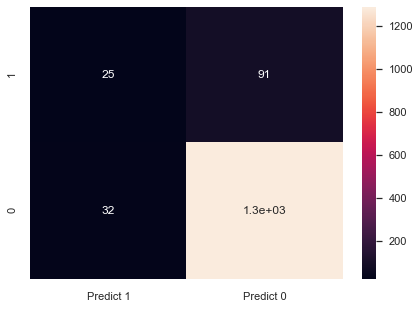

In [1935]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [1936]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()

Trainig accuracy 0.9082486551105798

Testing accuracy 0.9142259414225942



In [1937]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1318
           1       0.44      0.22      0.29       116

    accuracy                           0.91      1434
   macro avg       0.69      0.60      0.62      1434
weighted avg       0.89      0.91      0.90      1434



In [1938]:
# Predict probabilities for the test data.
probs = model.predict_proba(x_test)

In [1939]:
# Keep Probabilities of the positive class only.
probs = probs[:, 1]

## Compute the area under the ROC curve

In [1940]:
auc = metrics.roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .85 which means 85% predictions are correct

AUC: 0.85


In [1941]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

## ROC Curve

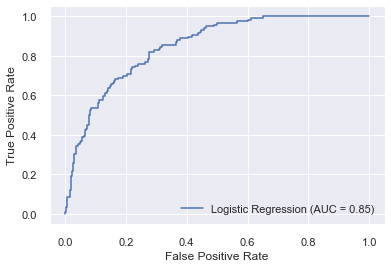

In [1942]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name='Logistic Regression')
display.plot() 
plt.show()      

## 5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

## Two Approaches have been implemented

## Approach 1 =  Using smote
## Approach 2 = Changing paramters

## Approach 1

In [1943]:
# In this Data set out of 5000 customers only 480 customers have taken personal loan (9%). So if we take class A and Class B, 
# 91% of the labels is classA and 9% of the labels is classB, so we can use the concept of Oversampling.
# Oversampling involves using the data we currently have to create more of it. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [1944]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_dummies.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_dummies.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [1945]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [1946]:
print("=======================BEFORE SMOTE==============================================")
print("Original PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 1]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 1])/len(df_dummies.index)) * 100))
print("Original PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 0]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 0])/len(df_dummies.index)) * 100))
print("")
print("Training PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PL Accepted True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL Not Accepted False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("")

print("=======================AFTER SMOTE==============================================")

print("Original PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 1]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 1])/len(df_dummies.index)) * 100))
print("Original PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['Personal Loan'] == 0]), (len(df_dummies.loc[df_dummies['Personal Loan'] == 0])/len(df_dummies.index)) * 100))
print("")
print("Training PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(y_train_res[y_train_res[:] == 1]), (len(y_train_res[y_train_res[:] == 1])/len(y_train_res)) * 100))
print("Training PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(y_train_res[y_train_res[:] == 0]), (len(y_train_res[y_train_res[:] == 0])/len(y_train_res)) * 100))
print("")
print("Test PL Accepted True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL Not Accepted False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("")

=======================BEFORE SMOTE==============================================
Original PL Accepted True Values    : 407 (8.51%)
Original PL Not Accepted False Values   : 4373 (91.49%)

Training PL Accepted True Values    : 291 (8.70%)
Training PL Not Accepted False Values   : 3055 (91.30%)

Test PL Accepted True Values        : 116 (8.09%)
Test PL Not Accepted False Values       : 1318 (91.91%)

Before OverSampling, the shape of train_X: (3346, 13)
Before OverSampling, the shape of train_y: (3346,) 


=======================AFTER SMOTE==============================================
Original PL Accepted True Values    : 407 (8.51%)
Original PL Not Accepted False Values   : 4373 (91.49%)

Training PL Accepted True Values    : 3055 (50.00%)
Training PL Not Accepted False Values   : 3055 (50.00%)

Test PL Accepted True Values        : 116 (8.09%)
Test PL Not Accepted False Values       : 1318 (91.91%)

After OverSampling, the shape of train_X: (6110, 13)
After OverSampling, the shape of

In [1947]:
smote_model = LogisticRegression()
smote_model.fit(x_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1948]:
# Measure Accuracy
smote_model.score(x_test,y_test)   # 81.72% accuracy

0.8172942817294282

In [1949]:
# Make class predictions for the testing set
y_smote_predict= smote_model.predict(x_test)

In [1950]:
from sklearn import metrics
print("Accuracy {0:0.2f}% ".format(metrics.accuracy_score(y_test,y_smote_predict)))

Accuracy 0.82% 


In [1951]:
y_test.value_counts()

0    1318
1     116
Name: Personal Loan, dtype: int64

In [1952]:
y_test.mean()

0.08089260808926081

In [1953]:
1-y_test.mean()

0.9191073919107392

In [1954]:
print("Trainig accuracy",smote_model.score(x_train_res,y_train_res))  
print()
print("Testing accuracy",smote_model.score(x_test, y_test))
print()

Trainig accuracy 0.8405891980360065

Testing accuracy 0.8172942817294282



In [1955]:
# confusion Metrics


metrics.confusion_matrix(y_test,y_smote_predict,labels=[1,0])
# True Positive  =  114
# True Negative  =  1076
# False Positive =  35
# False Negative =  275

array([[ 103,   13],
       [ 249, 1069]], dtype=int64)

In [1957]:
# Predict probabilities for the test data.
smote_probs = smote_model.predict_proba(x_test)

In [1958]:
# Keep Probabilities of the positive class only.
smote_probs = smote_probs[:, 1]

In [1959]:
auc_smote = metrics.roc_auc_score(y_test, smote_probs)
print('AUC: %.2f' % auc_smote)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .87 which means 87% predictions are correct

AUC: 0.91


In [1960]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

smote_fpr, smote_tpr, smote_thresholds = metrics.roc_curve(y_test, smote_probs)

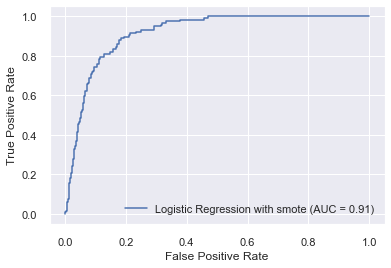

In [1961]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display_smote = metrics.RocCurveDisplay(fpr=smote_fpr, tpr=smote_tpr, roc_auc=auc_smote,estimator_name='Logistic Regression with smote')
display_smote.plot() 
plt.show()      

## Approach 2

In [1962]:
# Checking Parameters of logistic regression
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1963]:
smote_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Looping through solvers on provided dataset

In [1964]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model_solver = LogisticRegression(random_state=1,penalty='l2', C = 0.30,solver=i)  # changing values of solver
    model_solver.fit(x_train, y_train) 
    y_predict = model_solver.predict(x_test)     
    train_score.append(round(model_solver.score(x_train, y_train),3))
    test_score.append(round(model_solver.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not c

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.947, 0.908, 0.909, 0.913, 0.913]

[0.948, 0.914, 0.914, 0.919, 0.919]


C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Analysis changing solver (Data without smote)

* Default solver lbfgs
* Testing accuracy 0.9142259414225942
* New solver newton-cg
* Testing accuracy 0.948

## Looping through solvers in dataset with smote

In [1965]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model_solver_with_smote = LogisticRegression(random_state=1,penalty='l2', C = 0.30,solver=i)  # changing values of solver
    model_solver_with_smote.fit(x_train_res, y_train_res) 
    y_predict = model_solver_with_smote.predict(x_test)     
    train_score.append(round(model_solver_with_smote.score(x_train_res, y_train_res),3))
    test_score.append(round(model_solver_with_smote.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increas

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.919, 0.841, 0.842, 0.565, 0.564]

[0.893, 0.817, 0.814, 0.219, 0.217]


C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Analysis changing solver (Data with smote)

* Default solver lbfgs
* Testing accuracy 0.8172942817294282
* New solver newton-cg
* Testing accuracy 0.894

## Changing class weight in dataset without smote

In [1966]:
model = LogisticRegression(random_state=1,penalty='l2',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.7949790794979079

Testing accuracy 0.8089260808926081


## Analysis changing class weight (Data without smote)

* Default class weight None
* Testing accuracy 0.9142259414225942
* New class weight balanced
* Testing accuracy 0.8089260808926081

## Changing class weight in dataset with smote

In [1967]:
model = LogisticRegression(random_state=1,penalty='l2',class_weight='balanced') # changing class weight to balanced

model.fit(x_train_res, y_train_res) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train_res,y_train_res))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.8405891980360065

Testing accuracy 0.8172942817294282


## Analysis changing class weight (Data with smote)

* Default class weight None
* Testing accuracy 0.8172942817294282
* New class weight balanced
* Testing accuracy 0.817
* Class weight change is not changing test accuracy

## Running through dataset to check with different values of 'C'

In [1968]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.795, 0.795, 0.795, 0.795, 0.795, 0.795]

[0.809, 0.809, 0.809, 0.809, 0.809, 0.809]


## Analysis with different values for C (Data without smote)

* Default C= 1.0
* Testing accuracy 0.9142259414225942
* New values for C
* Testing accuracy has reduced

## Running through dataset with smote to check with different values of 'C'

In [1969]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train_res, y_train_res) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train_res,y_train_res),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.84, 0.841, 0.841, 0.841, 0.841, 0.841]

[0.817, 0.817, 0.817, 0.817, 0.817, 0.817]


## Analysis with different values for C (Data with smote)

* Default C= 1.0
* Testing accuracy 0.8172942817294282
* New class weight balanced
* New values for C
* Testing accuracy has not changed

## Final Model

In [1970]:
#Therefore final model is
model = LogisticRegression(solver='newton-cg') 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_predict,labels=[1,0]))
#draw_cm(y_test,y_predict))
print()
print("Recall:",metrics.recall_score(y_test,y_predict))
print()
print("Precision:",metrics.precision_score(y_test,y_predict))
print()
print("F1 Score:",metrics.f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",metrics.roc_auc_score(y_test,y_predict))

C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Trainig accuracy 0.9521817095038853

Testing accuracy 0.9539748953974896

Confusion Matrix
[[  66   50]
 [  16 1302]]

Recall: 0.5689655172413793

Precision: 0.8048780487804879

F1 Score: 0.6666666666666667

Roc Auc Score: 0.7784129558892785


C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [1869]:
# Predict probabilities for the test data.
probs = model.predict_proba(x_test)
# Keep Probabilities of the positive class only.
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .95 which means 95% predictions are correct

AUC: 0.95


In [1872]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

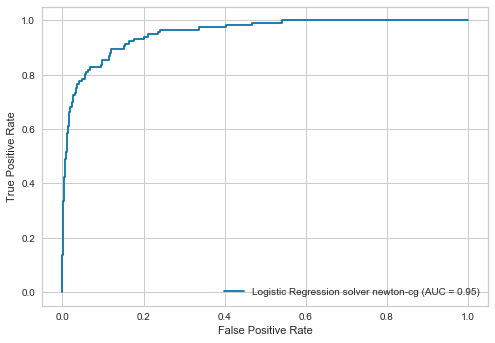

In [1878]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display_smote = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name='Logistic Regression solver newton-cg')
display_smote.plot() 
plt.show()  

C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


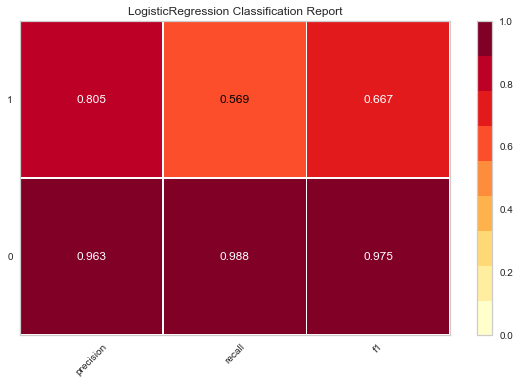

C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


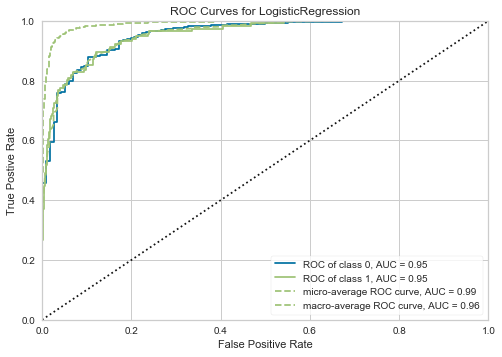

In [1874]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

## 6. Give Business understanding of your model? (5 marks)

* Confusion Matrix
* [[  66   50]
*  [  16 1302]]

The confusion matrix

* True Positives (TP): we correctly predicted that they will take personal loan 66

* True Negatives (TN): we correctly predicted that they won't take personal loan 1302

* False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 50 Falsely predict positive Type I error

* False Negatives (FN): we incorrectly predicted that they will not take personal loan (a "Type II error") 16 Falsely predict negative Type II error

* Model is predicting that likelyhod of 66 people taking personal loan is 95% accurate.

* Accuracy : The ratio of correctly predicted observation to the total observations                                             =  95%
* Precision: The ratio of correctly predicted positive observations to the total predicted positive observations                =  80%
* Recall   : The ratio of correctly predicted positive observations to the all observations in actual class                     =  56.8%
* F1 Score : The weighted average of Precision and Recall                                                                       =  66%
* AUC      : The performance of a classification model at all classification thresholds.                                        =  95%